In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("CardioGoodFitness.csv")

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


Total rows **180** and columns **9**

In [4]:
df.shape

(180, 9)

In [5]:
print(df.columns)

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


In [6]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [7]:
print("categorical:",[col for col in df.columns if df[col].dtypes == 'object'])
print("numerical:",[col for col in df.columns if df[col].dtypes != 'object'])

categorical: ['Product', 'Gender', 'MaritalStatus']
numerical: ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']


In [8]:
# seems no duplicated columns in the dataset: i.e repeatation same rows

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [11]:
# dataset seems clean without any nan values

In [12]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [13]:
# get to know unique items in each categorical columns
def unique_cat(col):
    return df[col].unique()

In [14]:
unique_cat("Product")

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [15]:
unique_cat("Gender")

array(['Male', 'Female'], dtype=object)

In [16]:
unique_cat("MaritalStatus")

array(['Single', 'Partnered'], dtype=object)

In [17]:
unique_cat("Age")

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [18]:
unique_cat("Usage")

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [19]:
unique_cat("Fitness")

array([4, 3, 2, 1, 5], dtype=int64)

In [20]:
unique_cat("Education")

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Education'}>],
       [<AxesSubplot: title={'center': 'Usage'}>,
        <AxesSubplot: title={'center': 'Fitness'}>],
       [<AxesSubplot: title={'center': 'Income'}>,
        <AxesSubplot: title={'center': 'Miles'}>]], dtype=object)

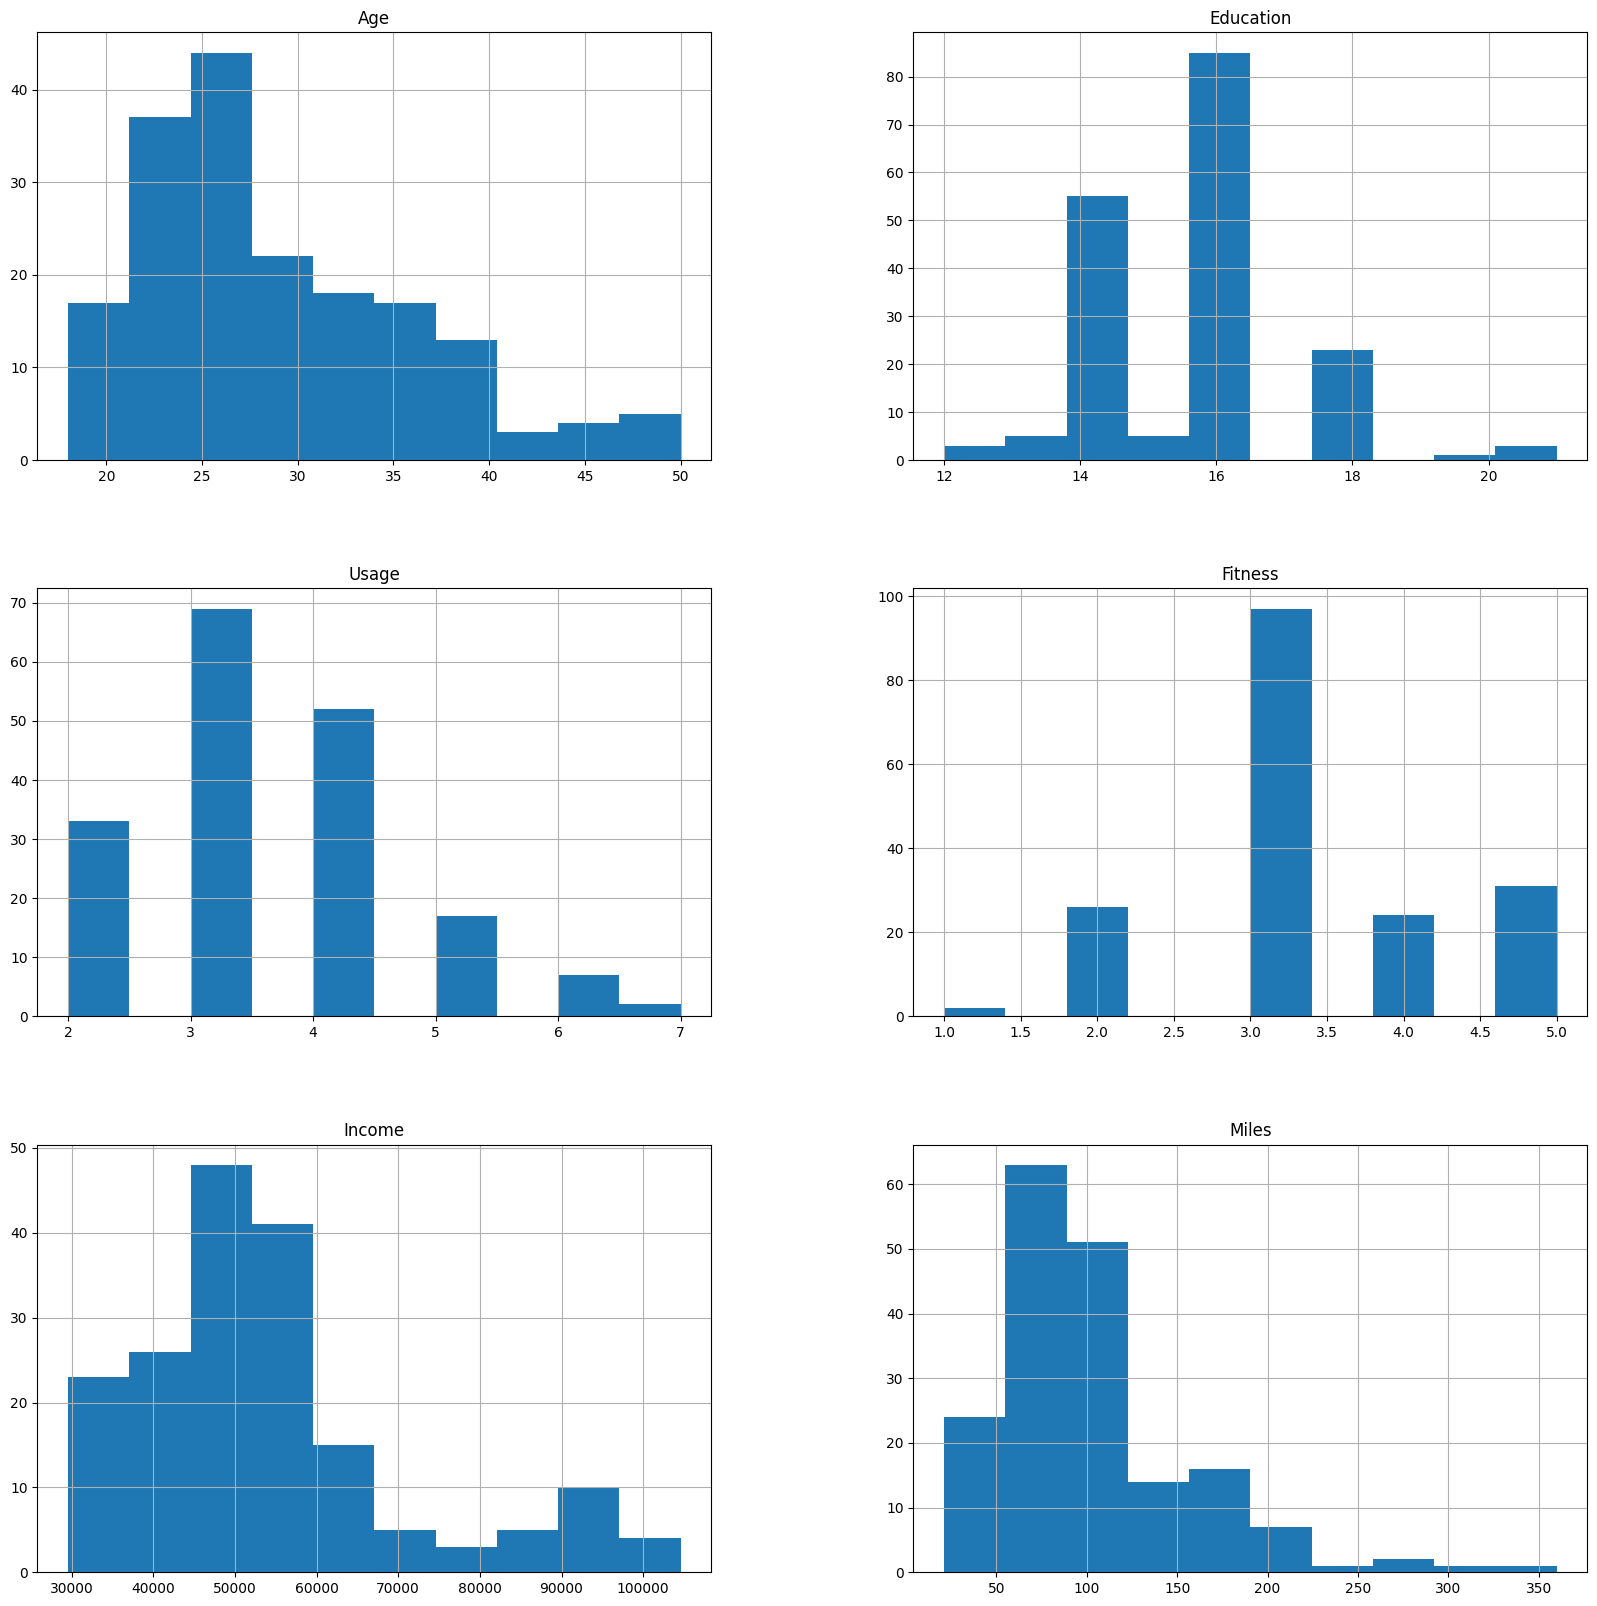

In [21]:
df.hist(figsize=(20,20))

Inference from the plot is :
age of 25 is most in number
after 35 age number of person are low in number
it indicated middle age persona are performing

<AxesSubplot: xlabel='Age', ylabel='Count'>

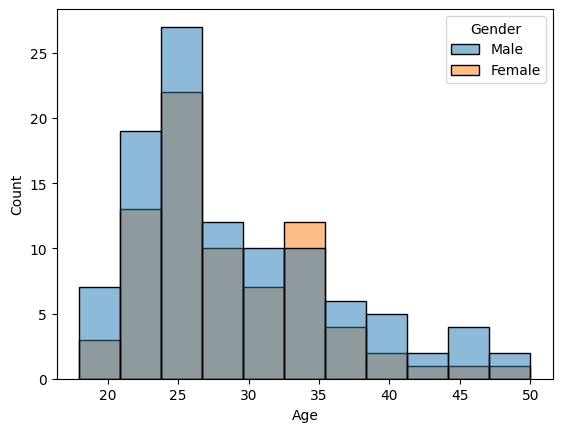

In [22]:
sns.histplot(data=df,x="Age",hue="Gender")

<AxesSubplot: ylabel='Gender'>

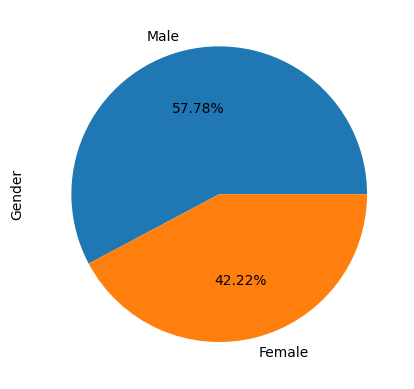

In [23]:
df["Gender"].value_counts().plot(kind="pie",autopct="%1.2f%%")

<AxesSubplot: ylabel='MaritalStatus'>

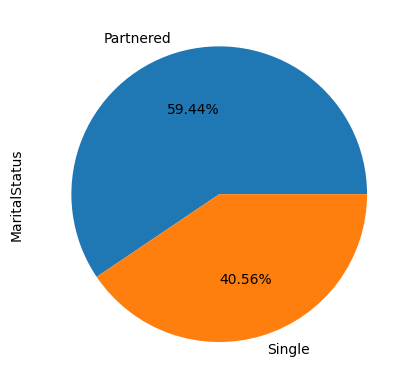

In [24]:
df["MaritalStatus"].value_counts().plot(kind="pie",autopct="%1.2f%%")

In [25]:
product_gender_count = df.groupby(["Product","Gender"]).count()

In [26]:
product_gender_count["Age"].unstack("Gender")

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


**OR**

In [27]:
p_gender_count = pd.crosstab(index=df["Product"],columns=df["Gender"])

In [28]:
p_gender_count

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


<AxesSubplot: xlabel='Product'>

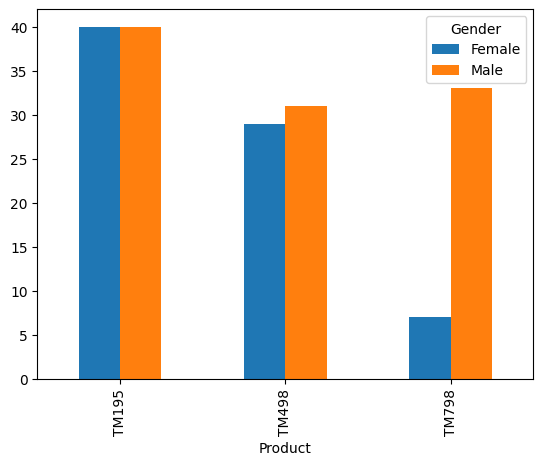

In [29]:
p_gender_count.plot(kind="bar")

**Inference from age plot** 
* `TM195` --> is equally used by both the gender 
* `TM498` --> used by **male** sightly **higher**
* `TM798` --> **female** usage is **very low**

In [30]:
Tm798 = df.query("Product == 'TM798'and Gender =='Female'")[["Product","Age","Gender","MaritalStatus","Income","Fitness"]]
Tm798

,Product,Age,Gender,MaritalStatus,Income,Fitness
144,TM798,23,Female,Single,53536,4
148,TM798,24,Female,Single,52291,5
152,TM798,25,Female,Partnered,61006,5
157,TM798,26,Female,Single,69721,3
162,TM798,28,Female,Partnered,92131,5
167,TM798,30,Female,Partnered,90886,5
171,TM798,33,Female,Partnered,95866,5


In [31]:
Tm798.agg({"Age":"median"})

Age    26.0
dtype: float64

In [32]:
df.query("Product == 'TM798'and Gender =='Male'")[["Product","Age","Gender","MaritalStatus","Fitness","Income"]]


,Product,Age,Gender,MaritalStatus,Fitness,Income
140,TM798,22,Male,Single,3,48658
141,TM798,22,Male,Single,5,54781
142,TM798,22,Male,Single,5,48556
143,TM798,23,Male,Single,5,58516
145,TM798,23,Male,Single,5,48556
146,TM798,24,Male,Single,5,61006
147,TM798,24,Male,Partnered,5,57271
149,TM798,24,Male,Single,5,49801
150,TM798,25,Male,Partnered,5,49801
151,TM798,25,Male,Partnered,4,62251


-- > TM798 is seem to elite product the income scaled high persons bought these product

-- > Then Aged peoples

In [33]:
p_g = df.groupby(["Product","MaritalStatus"]).count()
p_g["Age"].unstack()

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


**OR**

In [34]:
pd.crosstab(index=df["Product"],columns=df["MaritalStatus"])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


<AxesSubplot: xlabel='Product', ylabel='count'>

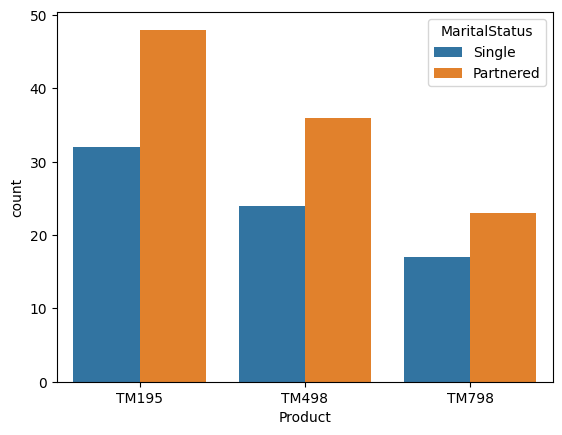

In [35]:
sns.countplot(data=df,x="Product",hue="MaritalStatus")

<AxesSubplot: xlabel='Product', ylabel='Miles'>

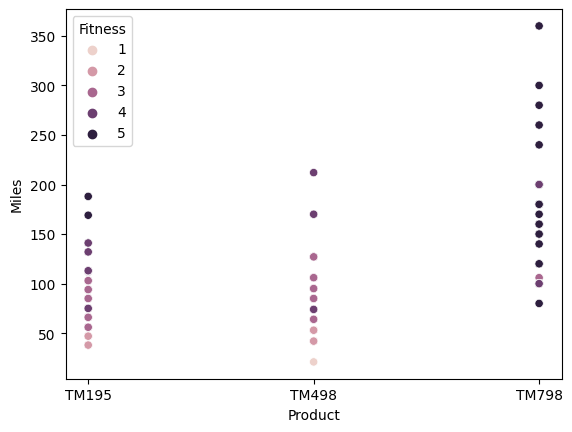

In [36]:
sns.scatterplot(data=df,x="Product",y="Miles",hue="Fitness",)

**Product TM798 user go for higher miles and have good fitness**

<AxesSubplot: xlabel='Product', ylabel='Miles'>

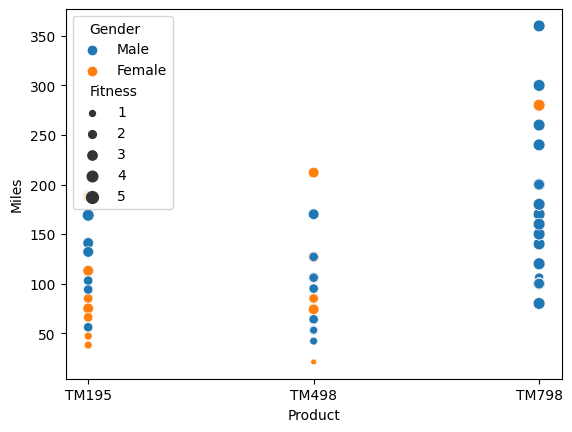

In [37]:
sns.scatterplot(data=df,x="Product",y="Miles",hue="Gender",size="Fitness")

**TM798 user are fit and they males**

In [38]:
male_30_above_miles_chart_table = df[(df["Age"]>=30)&(df["Gender"]=="Male")] 

<AxesSubplot: xlabel='Product', ylabel='Miles'>

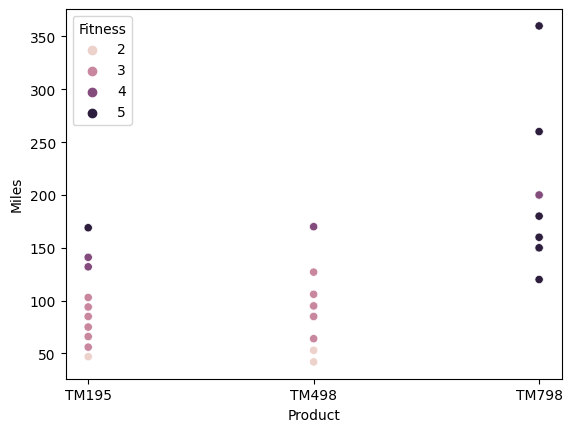

In [39]:
sns.scatterplot(data=male_30_above_miles_chart_table,x="Product",y="Miles",hue="Fitness")

In [40]:
female_30_above_miles_chart_table = df[(df["Age"]>=30)&(df["Gender"]=="Female")] 

<AxesSubplot: xlabel='Product', ylabel='Miles'>

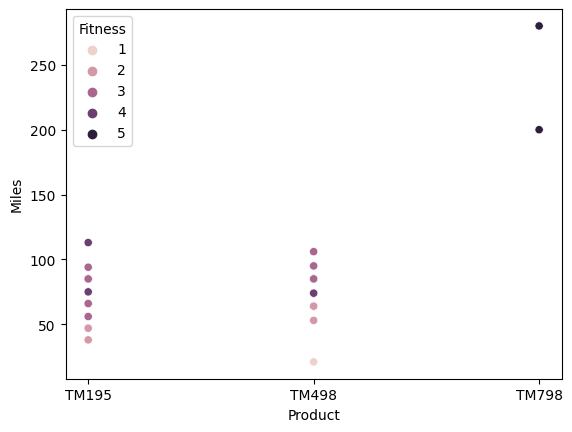

In [41]:
sns.scatterplot(data=female_30_above_miles_chart_table,x="Product",y="Miles",hue="Fitness")

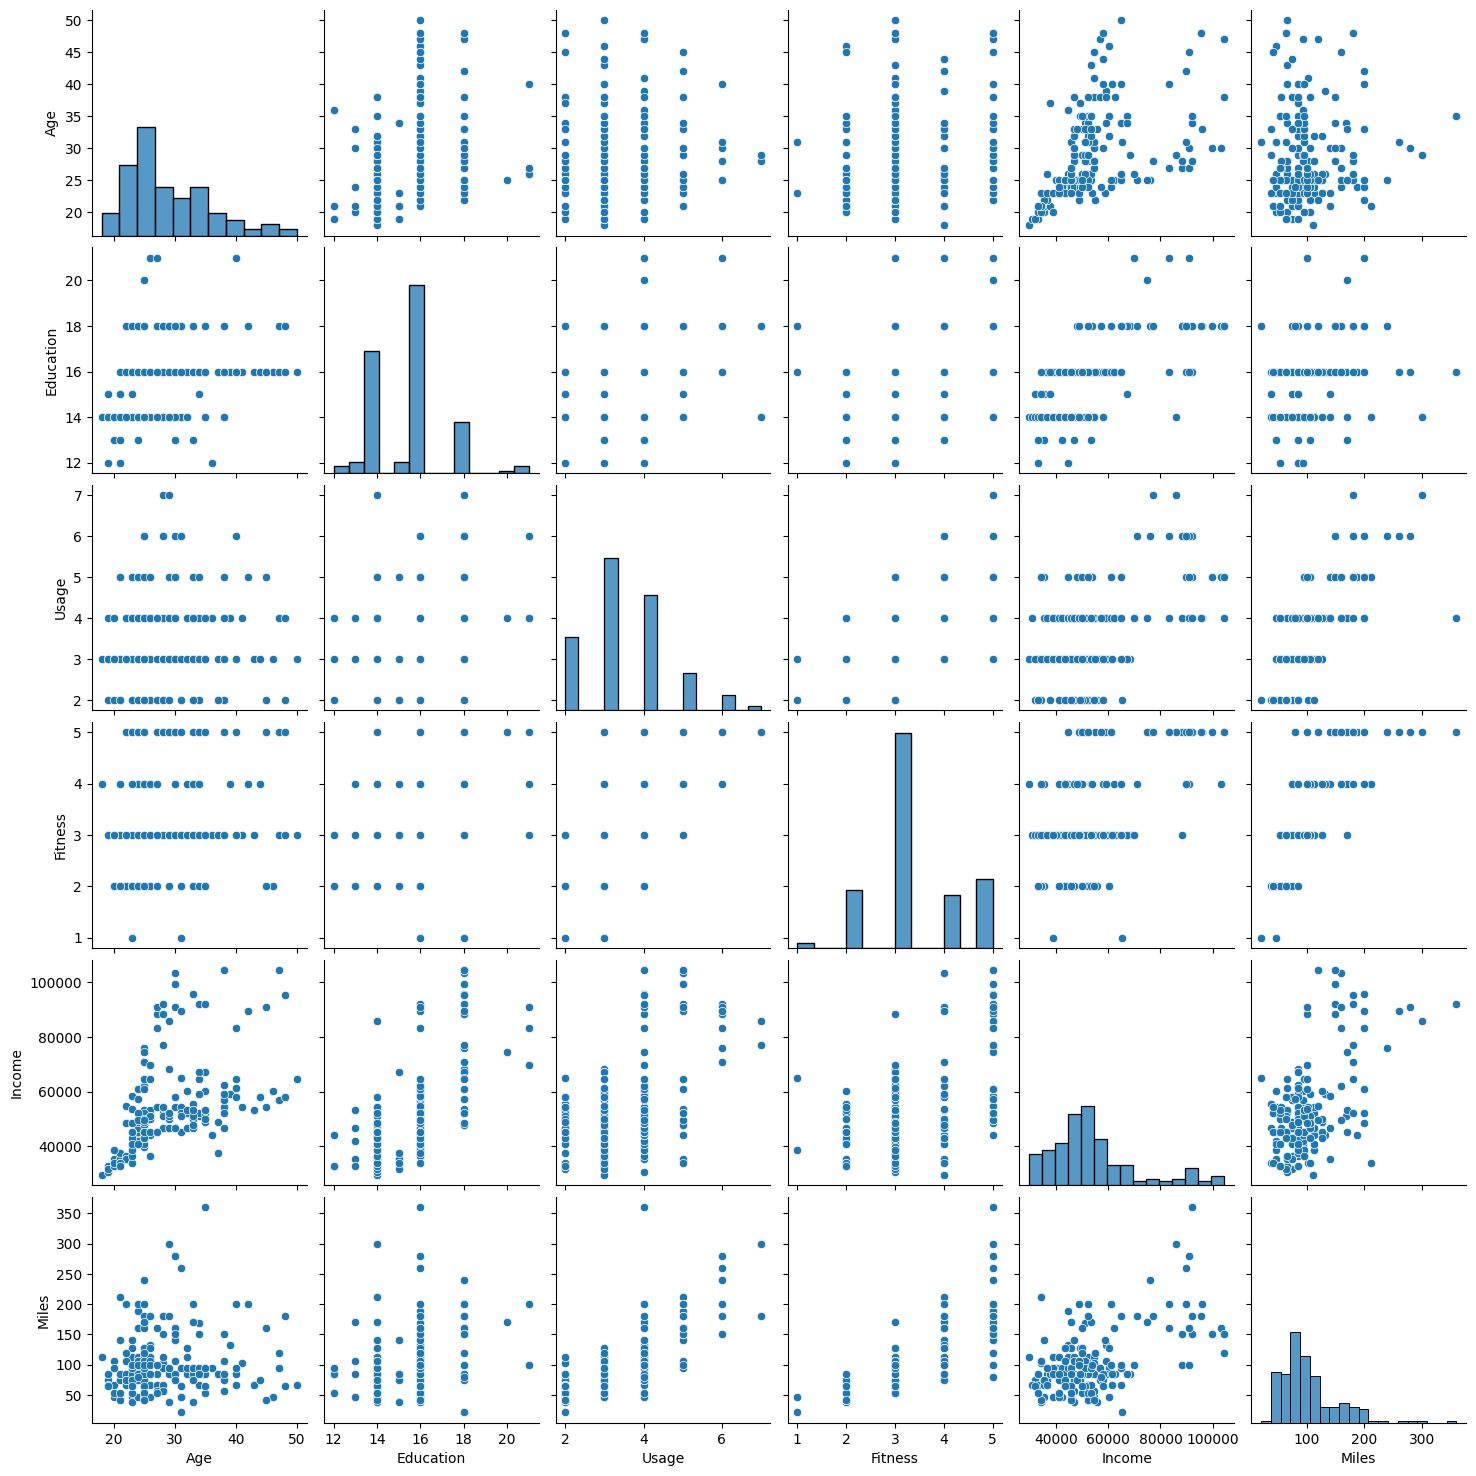

In [42]:
sns.pairplot(df)

In [43]:
corr = df.corr()

C:\Users\Thamizhiniyan\AppData\Local\Temp\ipykernel_1076\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [44]:
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot: >

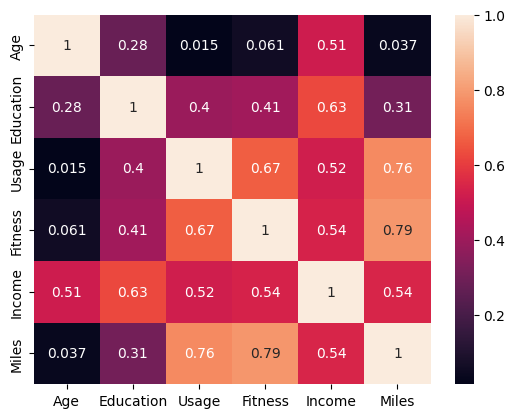

In [45]:
sns.heatmap(corr,annot=True)

`Miles --> fitness`

`Miles ---> useage`

 **show high positive correlation** 